In [1]:
# comprehensive_sentiment_analysis.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('reviews.csv')
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nColumn information:")
print(df.info())

Dataset shape: (4915, 12)

First few rows:
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   

In [3]:
# Check column names and adjust based on your dataset
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff', 'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound']


In [4]:
# If column names are different, adjust them
df.columns = ['Unnamed: 0','reviewerName', 'overall', 'reviewText', 'reviewTime', 
              'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
              'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound']

print("\n=== Dataset Overview ===")
print(f"Total reviews: {len(df)}")
print(f"Missing values:\n{df.isnull().sum()}")


=== Dataset Overview ===
Total reviews: 4915
Missing values:
Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [5]:
# Handle missing values
df['reviewText'] = df['reviewText'].fillna('')
df['reviewerName'] = df['reviewerName'].fillna('Unknown')

In [6]:
# Analyze rating distribution
print("\n=== Rating Distribution ===")
rating_dist = df['overall'].value_counts().sort_index()
print(rating_dist)


=== Rating Distribution ===
overall
1.0     244
2.0      80
3.0     142
4.0     527
5.0    3922
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

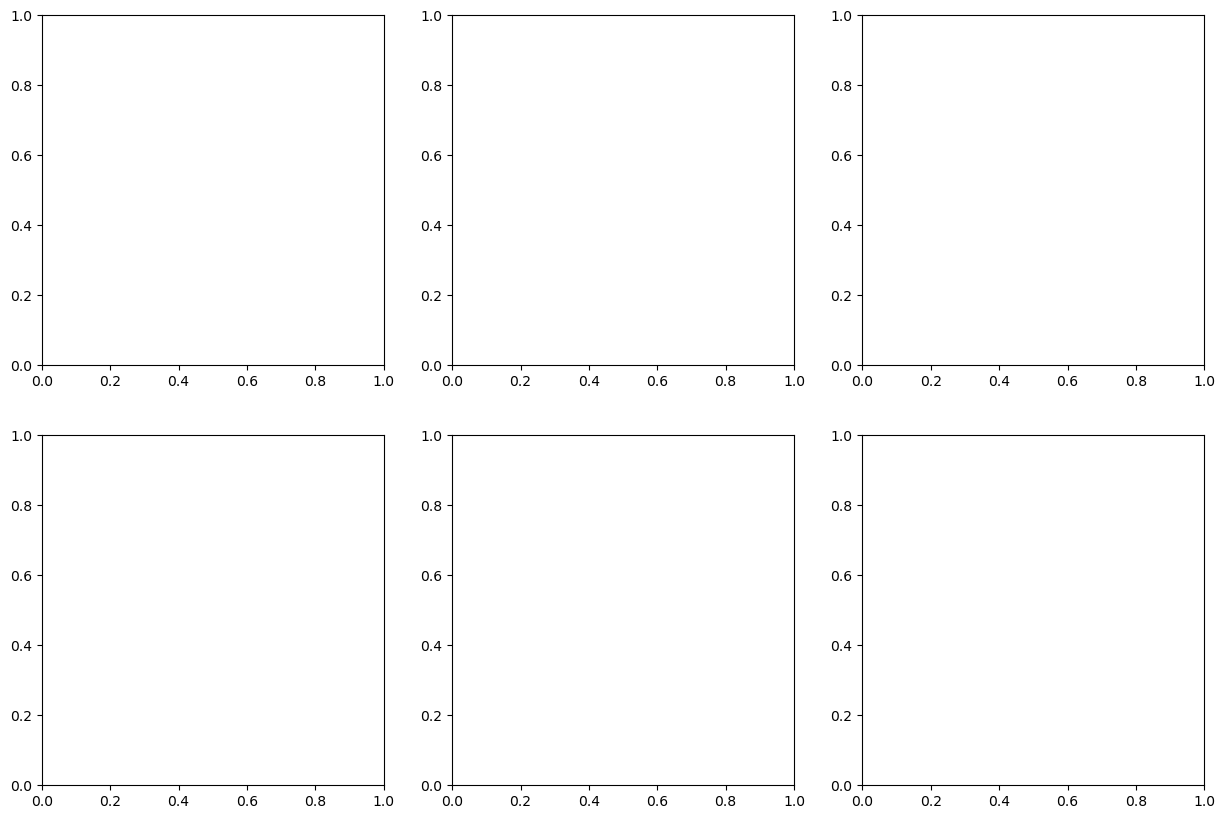

In [7]:
# Visualize rating distribution
plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

In [8]:
# Rating distribution
axes[0, 0].bar(rating_dist.index, rating_dist.values)
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')

Text(4.444444444444452, 0.5, 'Count')

In [9]:
# Sentiment based on ratings
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(rating_to_sentiment)

sentiment_dist = df['sentiment'].value_counts()
axes[0, 1].pie(sentiment_dist.values, labels=sentiment_dist.index, 
              autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Sentiment Distribution')

Text(0.5, 1.0, 'Sentiment Distribution')

In [10]:
# Helpfulness analysis
df['helpful_ratio'] = df.apply(
    lambda x: x['helpful_yes']/x['total_vote'] if x['total_vote'] > 0 else 0, axis=1
)

In [11]:
# Sentiment vs helpfulness
axes[0, 2].boxplot([df[df['sentiment']=='positive']['helpful_ratio'].dropna(),
                    df[df['sentiment']=='neutral']['helpful_ratio'].dropna(),
                    df[df['sentiment']=='negative']['helpful_ratio'].dropna()])
axes[0, 2].set_xticklabels(['Positive', 'Neutral', 'Negative'])
axes[0, 2].set_title('Helpfulness Ratio by Sentiment')
axes[0, 2].set_ylabel('Helpfulness Ratio')

Text(825.0326797385623, 0.5, 'Helpfulness Ratio')

In [12]:
# Time analysis
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%Y-%m-%d')
df['review_year'] = df['reviewTime'].dt.year
df['review_month'] = df['reviewTime'].dt.month

In [13]:
# Sentiment over time
sentiment_by_year = df.groupby(['review_year', 'sentiment']).size().unstack()
sentiment_by_year.plot(ax=axes[1, 0], kind='line', marker='o')
axes[1, 0].set_title('Sentiment Trend Over Years')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Reviews')

Text(4.444444444444452, 0.5, 'Number of Reviews')

In [14]:
# Text length analysis
df['text_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))
axes[1, 1].hist(df['text_length'], bins=50, edgecolor='black')
axes[1, 1].set_title('Distribution of Review Text Length')
axes[1, 1].set_xlabel('Number of Words')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim([0, 500])  # Limit for better visualization

(0.0, 500.0)

In [15]:
# Wilson lower bound distribution
axes[1, 2].hist(df['wilson_lower_bound'], bins=30, edgecolor='black')
axes[1, 2].set_title('Wilson Lower Bound Distribution')
axes[1, 2].set_xlabel('Wilson Lower Bound')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n=== Class Imbalance Analysis ===")
print(f"Positive reviews: {len(df[df['sentiment']=='positive'])} ({(len(df[df['sentiment']=='positive'])/len(df))*100:.1f}%)")
print(f"Neutral reviews: {len(df[df['sentiment']=='neutral'])} ({(len(df[df['sentiment']=='neutral'])/len(df))*100:.1f}%)")
print(f"Negative reviews: {len(df[df['sentiment']=='negative'])} ({(len(df[df['sentiment']=='negative'])/len(df))*100:.1f}%)")

<Figure size 640x480 with 0 Axes>


=== Class Imbalance Analysis ===
Positive reviews: 4449 (90.5%)
Neutral reviews: 142 (2.9%)
Negative reviews: 324 (6.6%)


In [18]:
#!pip install textblob

In [24]:
# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text, use_advanced=True):
    """Advanced text preprocessing"""
    if not isinstance(text, str):
        return ""
    
    text = str(text).lower()
    
    # Remove special characters, URLs, and numbers
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    if use_advanced:
        # Lemmatization with POS tagging
        lemmatizer = WordNetLemmatizer()
        pos_tags = nltk.pos_tag(tokens)
        tokens = []
        for word, tag in pos_tags:
            if tag.startswith('J'):
                tokens.append(lemmatizer.lemmatize(word, 'a'))  # Adjective
            elif tag.startswith('V'):
                tokens.append(lemmatizer.lemmatize(word, 'v'))  # Verb
            elif tag.startswith('N'):
                tokens.append(lemmatizer.lemmatize(word, 'n'))  # Noun
            elif tag.startswith('R'):
                tokens.append(lemmatizer.lemmatize(word, 'r'))  # Adverb
            else:
                tokens.append(lemmatizer.lemmatize(word))
    
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dafam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dafam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dafam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dafam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\dafam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dafam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is alre

In [25]:
# Apply preprocessing
print("\nPreprocessing text data...")
df['cleaned_text'] = df['reviewText'].apply(lambda x: preprocess_text(x, use_advanced=True))



Preprocessing text data...


In [26]:
# Extract additional features
print("\nExtracting additional features...")
def extract_text_features(text):
    """Extract various text-based features"""
    blob = TextBlob(str(text))
    
    features = {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity,
        'word_count': len(str(text).split()),
        'char_count': len(str(text)),
        'sentence_count': len(str(text).split('.')),
        'avg_word_length': np.mean([len(word) for word in str(text).split()]) if len(str(text).split()) > 0 else 0,
        'exclamation_count': str(text).count('!'),
        'question_count': str(text).count('?'),
        'uppercase_ratio': sum(1 for c in str(text) if c.isupper()) / len(str(text)) if len(str(text)) > 0 else 0
    }
    
    return pd.Series(features)

text_features = df['reviewText'].apply(extract_text_features)
df = pd.concat([df, text_features], axis=1)



Extracting additional features...


In [27]:
# Handle class imbalance
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

print("\n=== Handling Class Imbalance ===")



=== Handling Class Imbalance ===


In [28]:
# Prepare features for imbalance handling
X_text = df['cleaned_text']
X_meta = df[['polarity', 'subjectivity', 'word_count', 'char_count', 
             'helpful_ratio', 'wilson_lower_bound', 'score_average_rating']]
y = df['sentiment']

In [29]:
# Encode labels
label_encoder = {'negative': 0, 'neutral': 1, 'positive': 2}
y_encoded = y.map(label_encoder)

In [30]:
# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [31]:
# Create text features
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), min_df=3)
X_text_tfidf = tfidf.fit_transform(X_text)

In [32]:
# Combine features
from scipy.sparse import hstack
X_combined = hstack([X_text_tfidf, X_meta.values])

In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Original training set distribution: {np.bincount(y_train)}")
print(f"Original class proportions: {np.bincount(y_train) / len(y_train)}")

Original training set distribution: [ 259  114 3559]
Original class proportions: [0.06586979 0.02899288 0.90513733]


In [34]:
# Apply different imbalance handling techniques
print("\nApplying SMOTE for class imbalance...")
smote = SMOTETomek(random_state=42, sampling_strategy='auto')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Balanced training set distribution: {np.bincount(y_train_balanced)}")
print(f"Balanced class proportions: {np.bincount(y_train_balanced) / len(y_train_balanced)}")


Applying SMOTE for class imbalance...
Balanced training set distribution: [3456 3461 3464]
Balanced class proportions: [0.3329159  0.33339755 0.33368654]


In [35]:
# Save processed data
df.to_csv('processed_reviews_with_features.csv', index=False)
print("\nProcessed data saved successfully!")


Processed data saved successfully!


In [36]:
# Feature importance analysis
from sklearn.ensemble import RandomForestClassifier

print("\n=== Feature Importance Analysis ===")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)


=== Feature Importance Analysis ===


RandomForestClassifier(random_state=42)

In [37]:
# Get feature names
feature_names = list(tfidf.get_feature_names_out()) + list(X_meta.columns)

In [38]:
# Get top 20 important features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:20]

print("\nTop 20 Important Features:")
for i in indices[:20]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Top 20 Important Features:
polarity: 0.0282
month: 0.0170
char_count: 0.0145
get: 0.0141
card: 0.0135
word_count: 0.0128
wilson_lower_bound: 0.0120
return: 0.0117
die: 0.0099
helpful_ratio: 0.0099
would: 0.0090
great: 0.0089
try: 0.0086
score_average_rating: 0.0082
sandisk: 0.0078
lose: 0.0067
subjectivity: 0.0064
replacement: 0.0063
format: 0.0060
however: 0.0060


In [39]:
# Save vectorizer and metadata scaler
import joblib
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# Save label encoder
joblib.dump(label_encoder, 'label_encoder.joblib')

print("\n=== Data Summary ===")
print(f"Total samples: {len(df)}")
print(f"Features extracted: {X_combined.shape[1]}")
print(f"Text features: {X_text_tfidf.shape[1]}")
print(f"Meta features: {X_meta.shape[1]}")


=== Data Summary ===
Total samples: 4915
Features extracted: 3007
Text features: 3000
Meta features: 7
